# Basic Computer Vision

## Importing necessary libraries

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

## Load Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 7s 2us/step

### Look at an example image

9
0


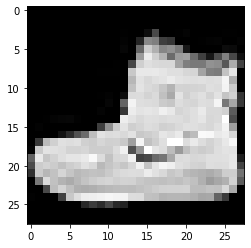

In [12]:
plt.imshow(train_images[0], cmap='gray', vmin=0, vmax=255)


## Define NN

Initial structure was a dense 128 neuron layer. The labels are integer based, 
so I think I need to convert them to categorical vectors. 

In [26]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, keras.utils.to_categorical(train_labels, num_classes=10), 
          epochs=10)
model.evaluate(test_images, keras.utils.to_categorical(test_labels, num_classes=10))

What if I normalize the inputs?

As seen below, the loss actually drops from ~0.6 to ~0.35 which is substantial. 
However, accuracy only rose from ~83% to ~87%.

In [20]:
model.fit(train_images/255, 
          keras.utils.to_categorical(train_labels, num_classes=10),
          epochs=10)
model.evaluate(test_images/255, keras.utils.to_categorical(test_labels, num_classes=10))

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.6219 - accuracy: 0.7831

[0.3490975090265274, 0.8733]

## Callbacks

Callback below shows stopping on accuracy or loss. 
*important to remember* that I need to instantiate an instance of the class.
If I just pass in the class I'll get errors.

In [22]:
class MyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('loss') < 0.3 or logs.get('accuracy') > 0.85:
            print('\nGood enough for government work!')
            self.model.stop_training = True

callbacks = MyCallback()

In [27]:
model.fit(train_images/255, 
          keras.utils.to_categorical(train_labels, num_classes=10),
          epochs=10, callbacks=[callbacks])
model.evaluate(test_images/255, keras.utils.to_categorical(test_labels, num_classes=10))

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4977 - accuracy: 0.8264

[0.338352019572258, 0.8745]

## MNIST Digits

Big takeaways here. When the category is provided as an integer, 'sparse_categorical_crossentropy'
works fine without having to convert to a categorical vector.

In [6]:
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [10]:
class AccuracyLimiter(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.99:
            print('\nNot bad, son!')
            self.model.stop_training = True

callbacks = AccuracyLimiter()

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/10
59712/60000 [============================>.] - ETA: 0s - loss: 0.0119 - accuracy: 0.9963 

[0.07194406894403392, 0.9811]